# Analysis of Historical S&P prices

### Dec 29, 1927 - Present
#### https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

##### Reading Data

In [233]:
import pandas as pd

df_uncleaned = pd.read_csv('HistoricalPrices.csv')
df_uncleaned.head()

,Date,Open,High,Low,Close
0,11/30/22,3957.64,4080.11,3938.58,4080.11
1,11/29/22,3964.19,3976.77,3937.65,3957.63
2,11/28/22,4005.36,4012.27,3955.77,3963.94
3,11/25/22,4023.34,4034.02,4020.76,4026.12
4,11/23/22,4001.02,4033.78,3998.66,4027.26


#### Cleaning Data

In [241]:
import datetime

df = pd.DataFrame({"Month": [], "Day": [], "Year": [], "Day_Of_Week": [], "Avg_Daily_Cost": []})
df_uncleaned.columns = df_uncleaned.columns.str.replace(' ', '') # Clean bad col names
for i in range(len(df_uncleaned)):
    dt = df_uncleaned["Date"][i]
    month, day, year = (int(x) for x in dt.split('/'))
    if year < 50 and year >= 10:
        year = int("20" + str(year))
    elif year < 10 and year > 0:
        year = int("200" + str(year))
    elif year < 100 and year > 50:
        year = int("19" + str(year))
    else:
        year = 2000
    df.loc[i, "Month"] = month
    df.loc[i, "Day"] = day
    df.loc[i, "Year"] = year
    df.loc[i, "Day_Of_Week"] = int(datetime.datetime(year, month, day).weekday())
    df.loc[i, "Avg_Daily_Cost"] = (df_uncleaned.loc[i, "High"] + df_uncleaned.loc[i, "Low"]) / 2
df["Month"] = df["Month"].astype(int)
df["Day"] = df["Day"].astype(int)
df["Year"] = df["Year"].astype(int)
df["Day_Of_Week"] = df["Day_Of_Week"].astype(int)
df = pd.concat([df, df_uncleaned.iloc[:, 1:5]], axis = 1)
df.head()

,Month,Day,Year,Day_Of_Week,Avg_Daily_Cost,Open,High,Low,Close
0,11,30,2022,2,4009.345,3957.64,4080.11,3938.58,4080.11
1,11,29,2022,1,3957.210,3964.19,3976.77,3937.65,3957.63
2,11,28,2022,0,3984.020,4005.36,4012.27,3955.77,3963.94
3,11,25,2022,4,4027.390,4023.34,4034.02,4020.76,4026.12
4,11,23,2022,2,4016.220,4001.02,4033.78,3998.66,4027.26


In [259]:
a = df.groupby(['Day_Of_Week']).mean()["Avg_Daily_Cost"]
print(a)
a.keys()

Day_Of_Week
0    1136.908479
1    1147.630009
2    1145.969152
3    1145.521672
4    1144.809399
Name: Avg_Daily_Cost, dtype: float64


Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Day_Of_Week')

Day_Of_Week
0    1136.908479
1    1147.630009
2    1145.969152
3    1145.521672
4    1144.809399
Name: Avg_Daily_Cost, dtype: float64


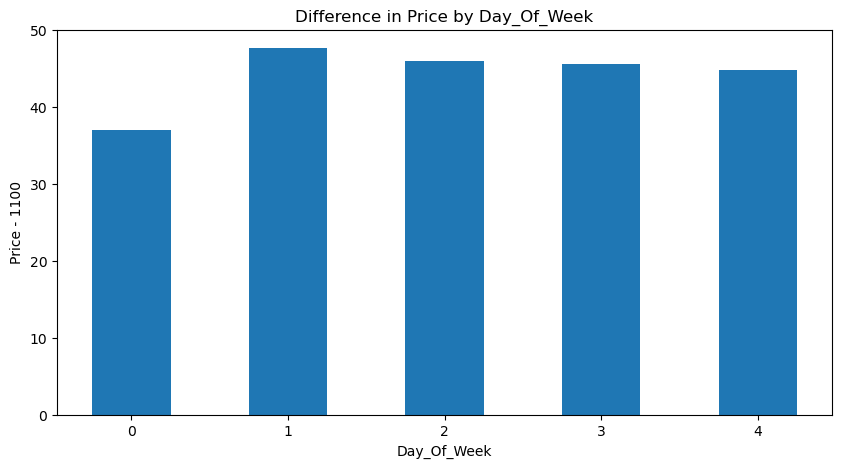

In [281]:
import numpy as np
import matplotlib.pyplot as plt

label = 'Day_Of_Week'
a = df.groupby([label]).mean()["Avg_Daily_Cost"]
print(a)
fig = plt.figure(figsize = (10, 5))
plt.bar(a.keys(), a - 1100, width = 0.5)
 
plt.xlabel(label)
plt.ylabel("Price" + " - 1100")
plt.title("Difference in Price by " + label)
plt.show()

Month
1     1100.615462
2     1122.350127
3     1122.876942
4     1137.321695
5     1137.299138
6     1146.197066
7     1156.576346
8     1168.516810
9     1164.588206
10    1149.710483
11    1187.842081
12    1135.715527
Name: Avg_Daily_Cost, dtype: float64


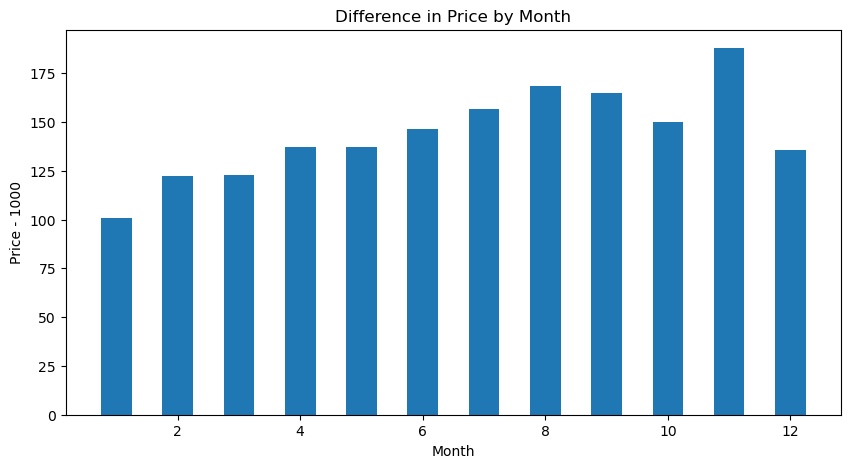

In [282]:
label = 'Month'
a = df.groupby([label]).mean()["Avg_Daily_Cost"]
print(a)
fig = plt.figure(figsize = (10, 5))
plt.bar(a.keys(), a - 1000, width = 0.5)

plt.xlabel(label)
plt.ylabel("Price" + " - 1000")
plt.title("Difference in Price by " + label)
plt.show()

Day
1     1166.713997
2     1135.002772
3     1141.725351
4     1161.030000
5     1129.634932
6     1128.348886
7     1149.974233
8     1155.076364
9     1145.253887
10    1139.966741
11    1149.336029
12    1138.034556
13    1139.473412
14    1148.154528
15    1138.773663
16    1142.086343
17    1141.348710
18    1143.473244
19    1134.813432
20    1129.673995
21    1140.165550
22    1159.140225
23    1142.656082
24    1139.338608
25    1148.408392
26    1143.515192
27    1148.231311
28    1157.334162
29    1157.364714
30    1136.640160
31    1145.168288
Name: Avg_Daily_Cost, dtype: float64


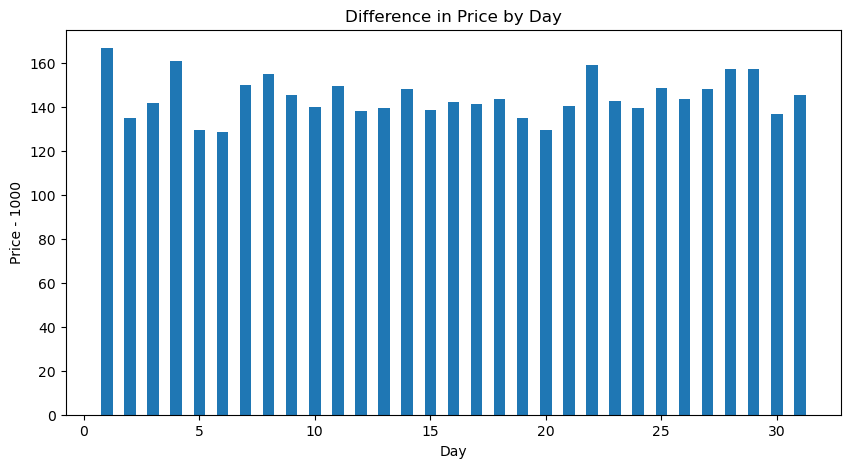

In [278]:
label = 'Day'
a = df.groupby([label]).mean()["Avg_Daily_Cost"]
print(a)
fig = plt.figure(figsize = (10, 5))
plt.bar(a.keys(), a - 1000, width = 0.5)
 
plt.xlabel(label)
plt.ylabel("Price" + " - 1000")
plt.title("Difference in Price by " + label)
plt.show()

Year
1978      96.119702
1979     102.955079
1980     118.687292
1981     128.070198
1982     119.723379
1983     160.414012
1984     160.496087
1985     186.740139
1986     236.207134
1987     286.903814
1988     265.726443
1989     322.801171
1990     334.469980
1991     375.958913
1992     415.555709
1993     451.441028
1994     460.284147
1995     541.221290
1996     669.946496
1997     872.750178
1998    1084.421687
1999    1326.330377
2000    1427.265258
2001    1193.682359
2002     993.883968
2003     964.632877
2004    1130.432143
2005    1207.290516
2006    1310.040677
2007    1476.595458
2008    1220.341423
2009     947.313571
2010    1138.916071
2011    1267.221032
2012    1378.586460
2013    1642.676369
2014    1930.564286
2015    2060.586310
2016    2093.530000
2017    2448.097749
2018    2746.465339
2019    2911.531131
2020    3216.334209
2021    4271.460139
2022    4114.635739
Name: Avg_Daily_Cost, dtype: float64


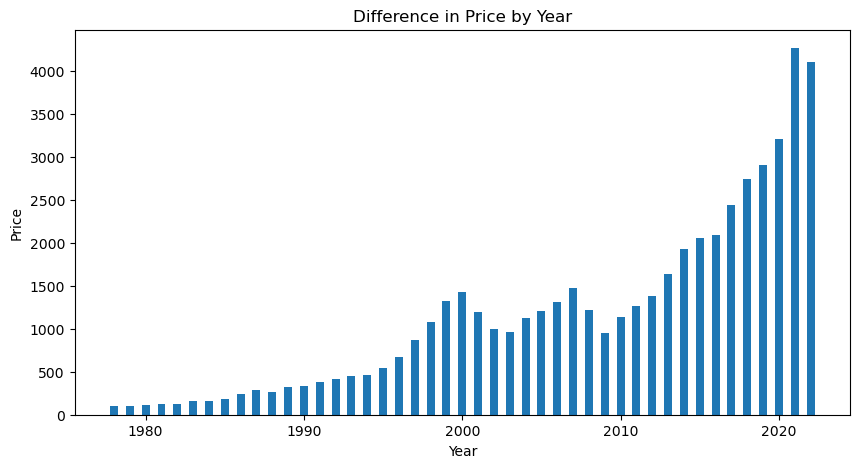

In [270]:
label = 'Year'
a = df.groupby([label]).mean()["Avg_Daily_Cost"]
print(a)
fig = plt.figure(figsize = (10, 5))
plt.bar(a.keys(), a, width = 0.5)
 
plt.xlabel(label)
plt.ylabel("Price")
plt.title("Difference in Price by " + label)
plt.show()